In [1]:
from pylab import *
%matplotlib inline

# Runge Kutta

In [24]:
def rk4(ec,p_ini,x,h=0.001):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-[0])/10
        
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros ((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in range(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        
        sol[i+1,:] = sol[i,:] + (h/6.)*(k1+2*k2+2*k3+k4)
        
    return tiempos, sol

In [32]:
def ec_mov(r_v,t,g=9.8,m=3):
    
    dx = r_v[2]
    dy = r_v[3]
    
    dvx = 0
    dvy = -(g/m)
    
    return array([dx,dy,dvx,dvy])

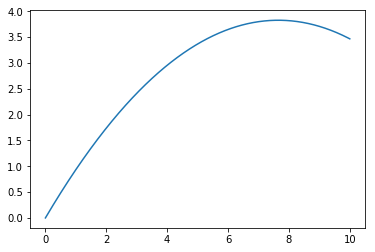

In [33]:
p_ini = [0,0,5,5]
t,sol = rk4(ec_mov,p_ini,[0,2])
plot(sol[:,0],sol[:,1])

In [34]:
def ec_mov_fri(r_v,t,gamma=1,g=9.8,m=3):
    
    dx = r_v[2]
    dy = r_v[3]
    
    dvx = -gamma*r_v[2]
    dvy = -gamma*r_v[3]-(g/m)
    
    return array([dx,dy,dvx,dvy])

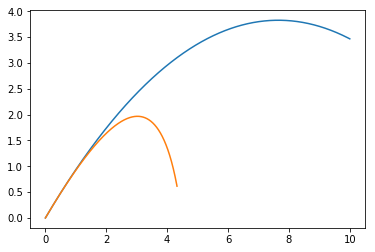

In [35]:
p_ini = [0,0,5,5]
t,sol = rk4(ec_mov,p_ini,[0,2])
plot(sol[:,0],sol[:,1])

tf, solf= rk4(ec_mov_fri,p_ini,[0,2])
plot(solf[:,0],solf[:,1])